In [2]:
# def hat_f( x , Theta ):
#     a=1/(1+exp ( −( Theta [ 1 ] * x[0] + Theta[2]* x [1] + Theta [ 3 ] ) ) )
#     b=1/(1+exp ( −( Theta [ 4 ]* x[0] + Theta [ 5 ]* x[1] + Theta [ 6 ] ) ) )
#     c =1/(1+exp ( −( Theta [ 7 ]*x [ 1 ] + Theta [ 8 ]*x [ 2 ] + Theta [ 9 ] ) ) )
#     d=1/(1+exp ( −( Theta [ 1 0 ]* a+Theta [ 1 1 ]* b+Theta [ 1 2 ]* c+Theta [ 1 3 ] ) ) )
#     e =1/(1+exp ( −( Theta [ 1 4 ]*a+Theta [ 1 5 ]* b+Theta [ 1 6 ]*c+Theta [ 1 7 ] ) ) )
#     hat_y=tanh ( Theta [ 1 8 ]*d+Theta [ 1 9 ]*e+Theta [ 2 0 ] )
#     return hat_y
# end


In [12]:
import numpy as np
np.random.seed(22)
n = 200
samples = np.array([np.array([np.random.uniform(-6, 6), np.random.uniform(-6, 6)]) for i in range(n)])

n_params = 21
Theta = list(np.zeros(n_params))
Theta[1]=0.12 
Theta[2]=1.6 
Theta[3]=3.2 
Theta[4]=1.5
Theta[5]=-1.1 
Theta[6]=3.2 
Theta[7]=1.4 
Theta[8]=0.54 
Theta[9]=-3.3 
Theta[10]=3.8 
Theta[11]=2.6
Theta[12]=-4.5
Theta[13]=-3.4
Theta[14]=-2.0
Theta[15]=-3.3
Theta[16]=1.7
Theta[17]=3.2
Theta[18]=7.2
Theta[19]=-6.0
Theta[20]=-1.8

W_layer1 = np.array([[Theta[1], Theta[4], Theta[7]],
                     [Theta[2], Theta[5], Theta[8]]])

W_layer2 = np.array([[Theta[10], Theta[14]],
                     [Theta[11], Theta[15]],
                     [Theta[12], Theta[16]]])

W_layer3 = np.array([[Theta[18]],
                     [Theta[19]]])

bias_1 = np.array([Theta[3], Theta[6], Theta[9]])
bias_2 = np.array([Theta[13], Theta[17]])
bias_3 = np.array([Theta[20]])

In [13]:
import lasagne
import theano
import theano.tensor as T
from lasagne.nonlinearities import sigmoid, tanh

x = T.matrix('x')

input_layer = lasagne.layers.InputLayer((1, 2), input_var=x) # x hier schon eingeben?
hidden_1 = lasagne.layers.DenseLayer(input_layer, num_units=3, W=W_layer1, b=bias_1, nonlinearity=sigmoid)
hidden_2 = lasagne.layers.DenseLayer(hidden_1, num_units=2, W=W_layer2, b=bias_2, nonlinearity=sigmoid)
output_layer =lasagne.layers.DenseLayer(hidden_2, num_units=1, W=W_layer3, b=bias_3, nonlinearity=tanh)

network_output = lasagne.layers.get_output(output_layer, x)
compute_output = theano.function([x], network_output)

# Perform forward step
output_result = compute_output(samples)

positives = output_result > 0
positives = positives[:,0]

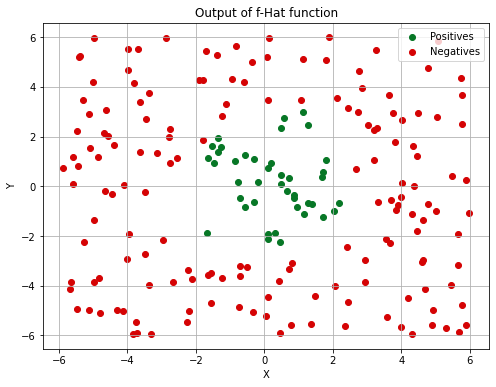

In [14]:
import matplotlib.pyplot as plt

x_values = samples[:, 0]
y_values = samples[:, 1]

# Plot the samples in a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values[positives], y_values[positives], color='#077726', label='Positives')
plt.scatter(x_values[~positives], y_values[~positives], color='#d50304', label='Negatives')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Output of f-Hat function')
plt.legend()
plt.grid(True)
plt.show()